In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [30]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# This depends on the no of firms in the market - these are 10 sunset like colors 
colors = ["#8B0000", "#FF6B48", "#FFC0CB", "#FFD268", "#E6E6FA", "#9400D3", "#FF8C71", "#CC4BFF", "#FF00FF", "#FF67C2"]


In [31]:
df= pd.read_csv('../data/data_endogenouswage/market_endogenouswage_4.csv')
print(df)




     market_ids  firm_ids  characteristic1  characteristic2    prices  \
0             1         1         3.432877         2.278947  0.612159   
1             1         2         3.561671         3.132666  0.617115   
2             1         3         2.108869         3.038669  0.600412   
3             1         4         3.413397         2.377378  0.612841   
4             1         5         2.958422         3.285397  0.615119   
..          ...       ...              ...              ...       ...   
995         100         6         2.284937         3.381882  0.612908   
996         100         7         2.812903         3.923562  0.618641   
997         100         8         3.720615         3.704774  0.625043   
998         100         9         3.252677         3.974305  0.622710   
999         100        10         2.699981         3.822899  0.617579   

     marginal_cost    shares   profits       markups  e_quantity    capital  \
0         0.000052  0.000029  0.000018  1183

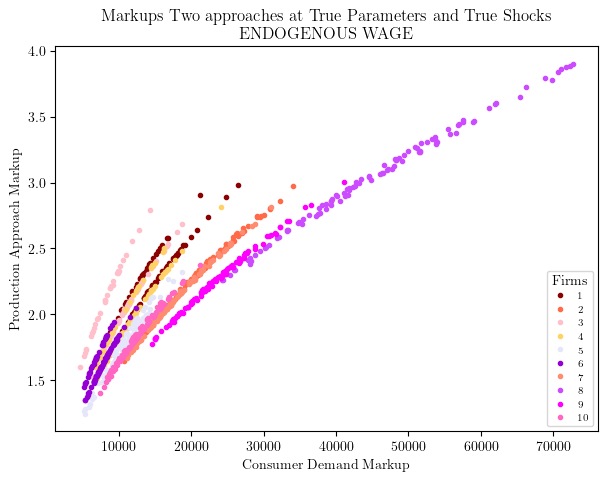

In [32]:
# Calculate markups_deloecker
# Average market price at around 1.45 lets say that that is kinda known so you can
markups_deloecker = (0.6 * df.prices * df.e_quantity) / (15 * df.labor)
df['markups_deloecker'] = markups_deloecker

# x45 = [1.2, 1.28]
# y45 = [1.2, 1.28]

groups = df.groupby('firm_ids')

# Define colors for each firm ID group

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling

# Iterate over each group
for i, (name, group) in enumerate(groups):
    color = colors[i % len(colors)]  # Assign color based on index
    
    # Plot the scatter points for the group with the assigned color
    ax.plot(group.markups, group.markups_deloecker, marker='o', linestyle='', ms=3, label=name, c=color)

# Plot additional line (x=y)
# plt.plot(x45, y45, c='black', linestyle='--')

plt.title("Markups Two approaches at True Parameters and True Shocks \n ENDOGENOUS WAGE")
plt.xlabel("Consumer Demand Markup")
plt.ylabel("Production Approach Markup")
plt.legend(
           fontsize='7',
           loc="lower right",
        #    bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
        #    shadow=True, 
        #    ncol=10,
        #    columnspacing=0.8, 
           title='Firms'
)
plt.show()


In [33]:
# get wage markdown

df['wage_markdown'] = df.markups/df.markups_deloecker

In [34]:
df['average_car'] = (df.characteristic1 + df.characteristic2)/2

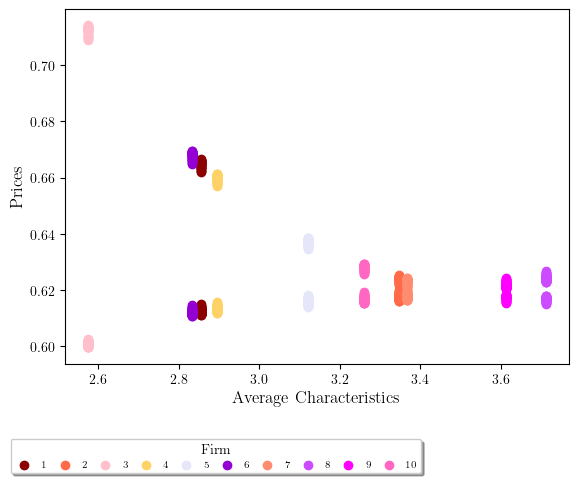

In [35]:
# Define the colors for each firm ID
colors = ["#8B0000", "#FF6B48", "#FFC0CB", "#FFD268", "#E6E6FA", "#9400D3", "#FF8C71", "#CC4BFF", "#FF00FF", "#FF67C2"]

# Group the dataframe by firm_ids
grouped_df_1 = df.groupby('firm_ids')


plt.figure(figsize = (6, 5))

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_1.groups.keys(), colors):
    group = grouped_df_1.get_group(firm_id)
    plt.scatter(group.average_car, group.prices, c=color, label=firm_id)

# Set labels and show the plot
# plt.title('Market Prices Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristics',  fontsize=12)
plt.ylabel('Prices',  fontsize=12)
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)

plt.tight_layout()
plt.savefig('avg_char_price_endogwage.pdf')      
plt.show()

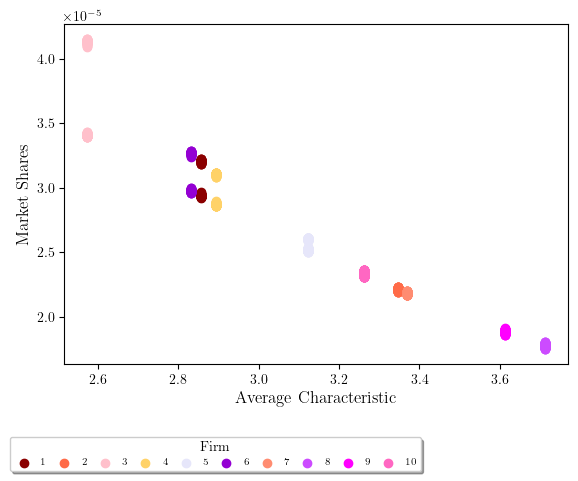

In [36]:
# Group the dataframe by firm_ids
grouped_df_2 = df.groupby('firm_ids')



plt.figure(figsize = (6, 5))

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_2.groups.keys(), colors):
    group = grouped_df_2.get_group(firm_id)
    plt.scatter(group.average_car, group.shares, c=color, label=firm_id)

# Set labels and show the plot
# plt.title('Market Shares Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristic', fontsize=12)
plt.ylabel('Market Shares', fontsize=12)
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)

plt.tight_layout()
plt.savefig('avg_char_share_endogwage.pdf')      
plt.show()


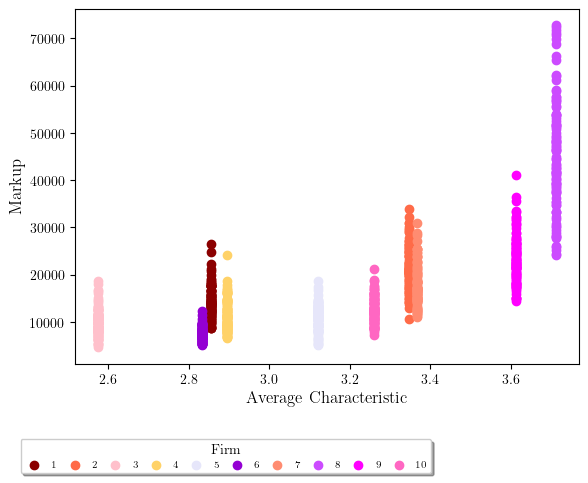

In [37]:
# Group the dataframe by firm_ids
grouped_df_2 = df.groupby('firm_ids')



plt.figure(figsize = (6, 5))

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_2.groups.keys(), colors):
    group = grouped_df_2.get_group(firm_id)
    plt.scatter(group.average_car, group.markups, c=color, label=firm_id)

# Set labels and show the plot
# plt.title('Market Shares Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristic', fontsize=12)
plt.ylabel('Markup', fontsize=12)
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)

plt.tight_layout()
plt.savefig('avg_char_markup_endogwage.pdf')      
plt.show()


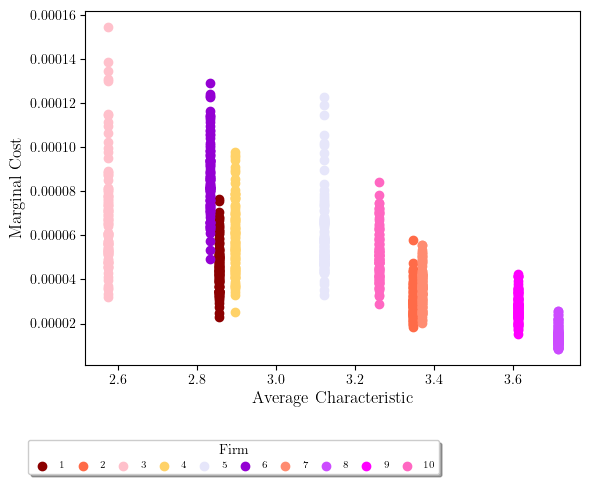

In [38]:
# Group the dataframe by firm_ids
grouped_df_2 = df.groupby('firm_ids')



plt.figure(figsize = (6, 5))

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_2.groups.keys(), colors):
    group = grouped_df_2.get_group(firm_id)
    plt.scatter(group.average_car, group.marginal_cost, c=color, label=firm_id)

# Set labels and show the plot
# plt.title('Market Shares Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristic', fontsize=12)
plt.ylabel('Marginal Cost', fontsize=12)
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)

plt.tight_layout()
plt.savefig('avg_char_mc_endogwage.pdf')      
plt.show()

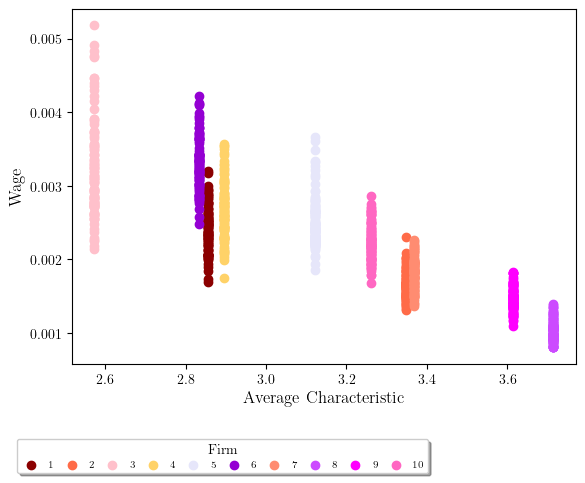

In [39]:
# Group the dataframe by firm_ids
grouped_df_2 = df.groupby('firm_ids')



plt.figure(figsize = (6, 5))

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_2.groups.keys(), colors):
    group = grouped_df_2.get_group(firm_id)
    plt.scatter(group.average_car, group.wage, c=color, label=firm_id)

# Set labels and show the plot
# plt.title('Market Shares Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristic', fontsize=12)
plt.ylabel('Wage', fontsize=12)
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)

plt.tight_layout()
plt.savefig('avg_char_wage_endogwage.pdf')      
plt.show()

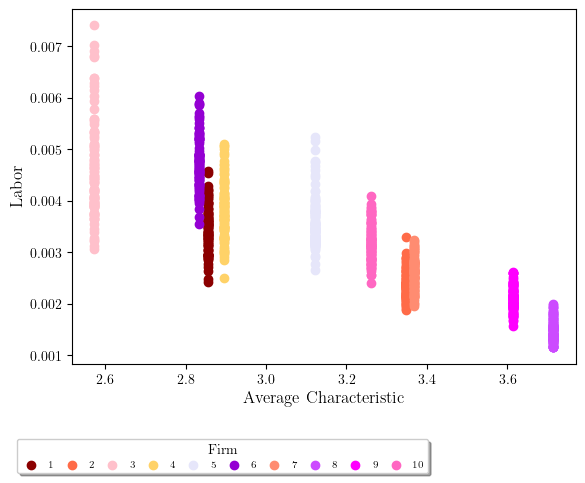

In [40]:
# Group the dataframe by firm_ids
grouped_df_2 = df.groupby('firm_ids')



plt.figure(figsize = (6, 5))

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_2.groups.keys(), colors):
    group = grouped_df_2.get_group(firm_id)
    plt.scatter(group.average_car, group.labor, c=color, label=firm_id)

# Set labels and show the plot
# plt.title('Market Shares Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristic', fontsize=12)
plt.ylabel('Labor', fontsize=12)
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)

plt.tight_layout()
plt.savefig('avg_char_labor_endogwage.pdf')      
plt.show()

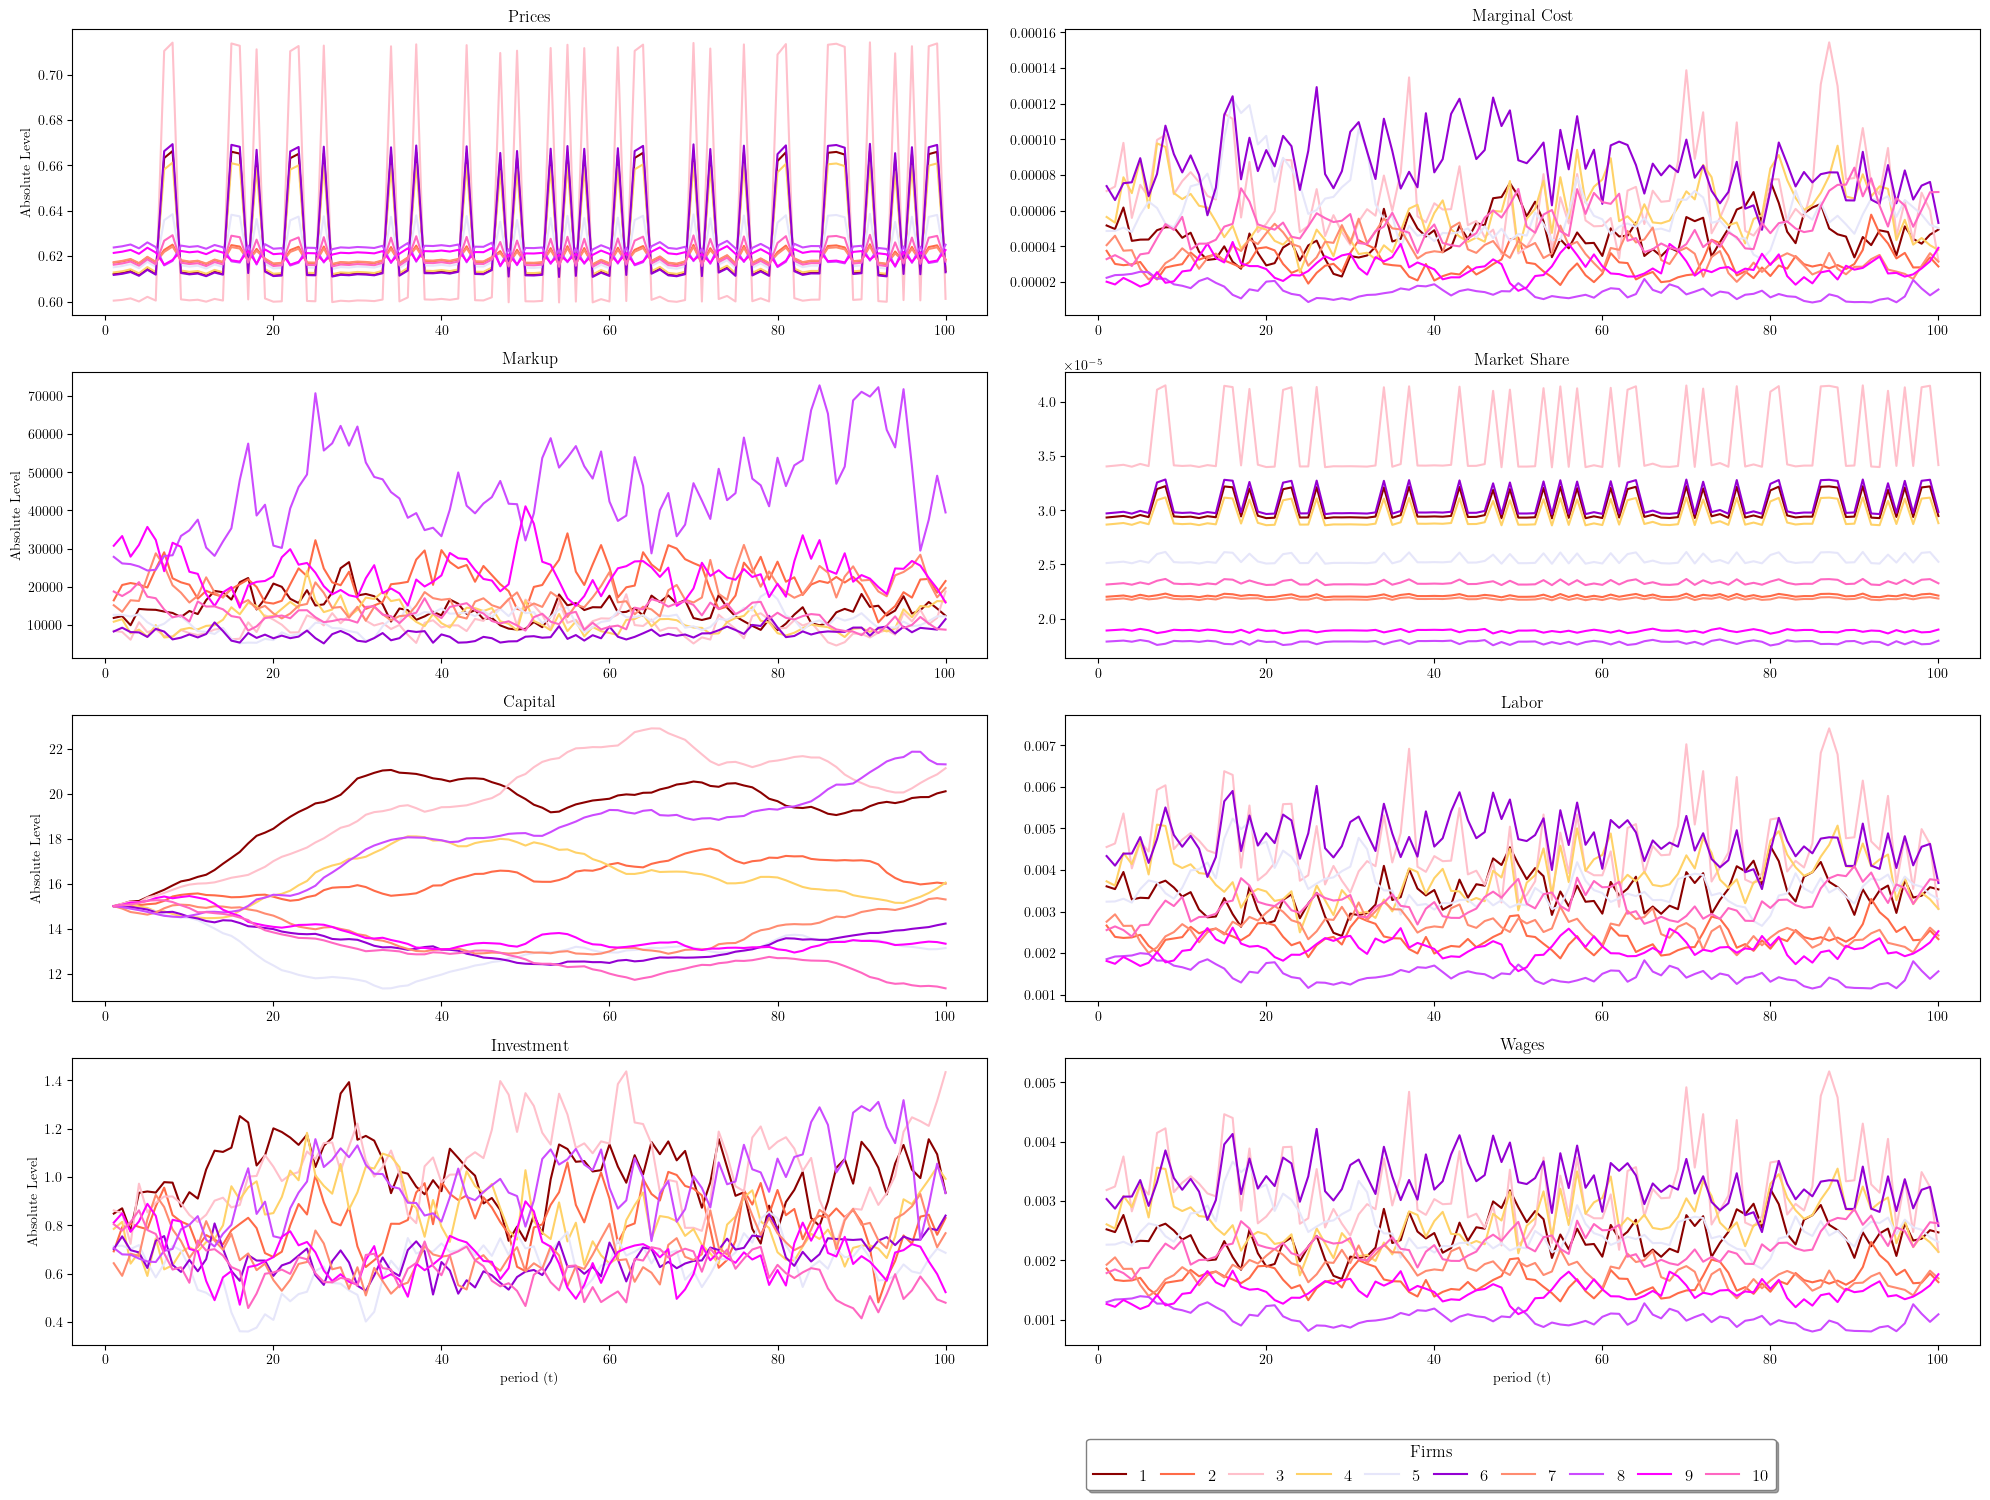

In [41]:
import matplotlib.pyplot as plt
import random

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(20, 15))

lines = []  # To store the lines for the legend

for i, firm in enumerate(df['firm_ids'].unique()):
    df_firm = df[df['firm_ids'] == firm]
    line1, = ax1.plot(df_firm.market_ids, df_firm.prices, color=colors[i])
    line2, = ax2.plot(df_firm.market_ids, df_firm.marginal_cost, color=colors[i])
    line3, = ax3.plot(df_firm.market_ids, df_firm.markups, color=colors[i])
    line4, = ax4.plot(df_firm.market_ids, df_firm.shares, color=colors[i])
    line5, = ax5.plot(df_firm.market_ids, df_firm.capital, color=colors[i])
    line6, = ax6.plot(df_firm.market_ids, df_firm.labor, color=colors[i])
    line7, = ax7.plot(df_firm.market_ids, df_firm.investment, color=colors[i])
    line8, = ax8.plot(df_firm.market_ids, df_firm.wage, color=colors[i])
    
    lines.append(line1)  # Add the line to the legend list

ax1.set_title('Prices')
ax1.set_ylabel('Absolute Level')
ax2.set_title('Marginal Cost')
ax3.set_title('Markup')
ax3.set_ylabel('Absolute Level')
ax4.set_title('Market Share')
ax5.set_title('Capital')
ax5.set_ylabel('Absolute Level')

ax6.set_title('Labor')
ax7.set_title('Investment')
ax7.set_xlabel('period (t)')
ax7.set_ylabel('Absolute Level')

ax8.set_title('Wages')
ax8.set_xlabel('period (t)')

# Creating the legend
legend_labels = df['firm_ids'].unique()
plt.legend(lines, legend_labels,
           fontsize='12',
           loc="upper center",
           bbox_to_anchor=(0.4, -0.3),
           fancybox=True,
           shadow=True,
           ncol=10,
           columnspacing=0.8,
           facecolor='white',
           edgecolor='gray',
           title="Firms",
           title_fontsize='12',
           labelspacing=0.5
)

plt.tight_layout()
plt.savefig('model_over_time_endogwage.pdf')
plt.show()

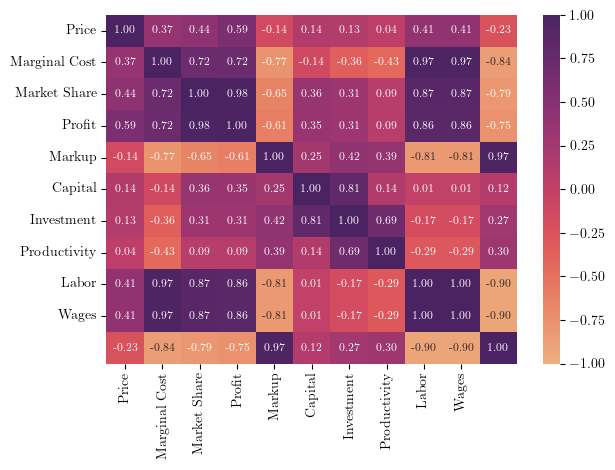

In [42]:
# heatmap_df = df.drop(['market_ids','firm_ids', 'characteristic1', 'characteristic2', 'e_quantity'], axis=1)
heatmap_df = df.drop(['market_ids','firm_ids', 'e_quantity', 'characteristic1', 'characteristic2', 'indirect_util', 'average_car', 'markups_deloecker'], axis=1)
labels = ['Price', 'Marginal Cost', 'Market Share', 'Profit', 'Markup', 'Capital', 'Investment', 'Productivity', 'Labor', 'Wages']
fig = sns.heatmap(heatmap_df.corr(), xticklabels=labels, yticklabels=labels,
                   vmin=-1., vmax=1., cmap="flare",
                     annot=True, fmt='.2f', annot_kws={"size":8})
plt.tight_layout() 
# plt.title("Heatmap of Model Correlations")
plt.savefig('correlation_map_model_endogwage.pdf')